# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [17]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [19]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [20]:
%matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [21]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [22]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

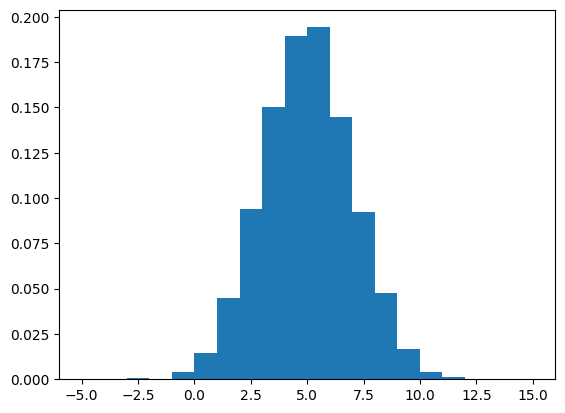

In [25]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [10]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

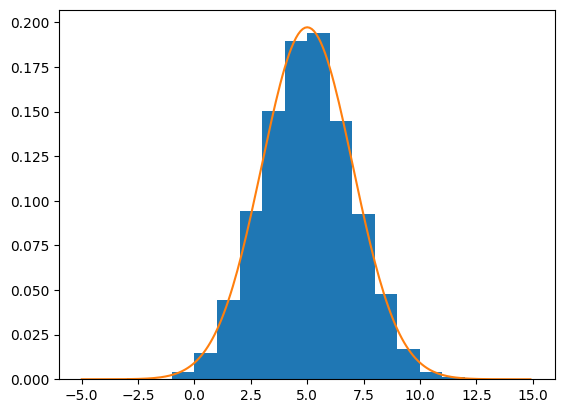

In [26]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density = True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

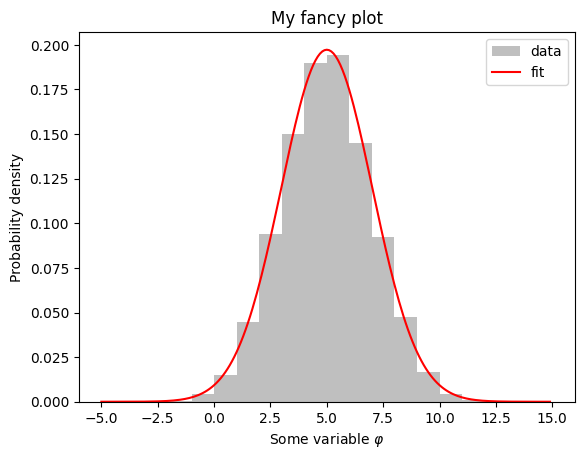

In [27]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, label='data', color='0.75', lw=0.2, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

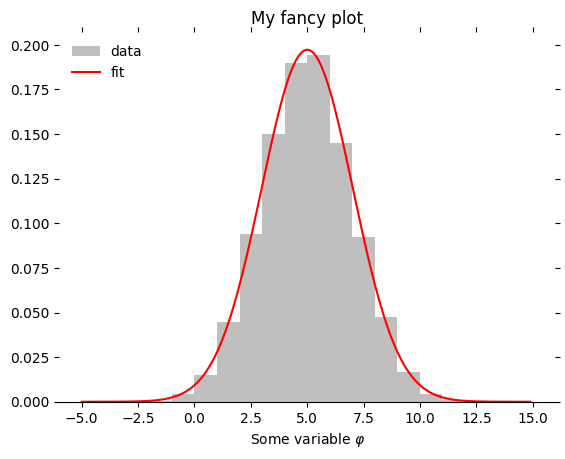

In [28]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, label='data', color='0.75', lw=0.2, density = True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

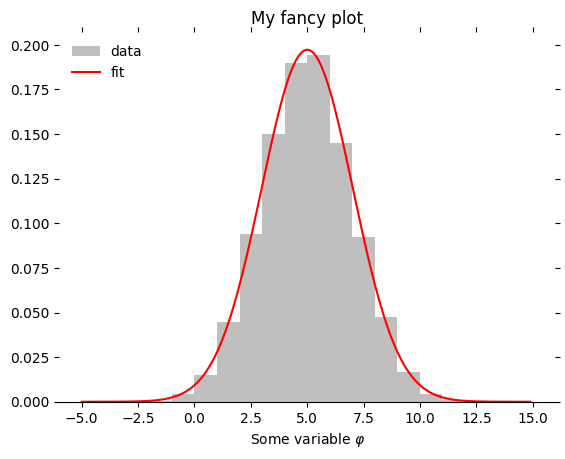

In [29]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, label='data', color='0.75', lw=0.2, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

Now we make some other plots with generated data. Let us generate random data first



In [50]:
rand_matrix = np.random.random((30,9))
rand_matrix

array([[0.43488394, 0.63067072, 0.82465792, 0.36420023, 0.25426868,
        0.40108554, 0.1382537 , 0.46539152, 0.82756404],
       [0.28562817, 0.64194725, 0.97391522, 0.33508399, 0.30635822,
        0.53789669, 0.52180856, 0.00538922, 0.92656382],
       [0.17450002, 0.62954296, 0.11703147, 0.44712305, 0.87291961,
        0.90830681, 0.68383371, 0.38229322, 0.20128693],
       [0.41152318, 0.63162024, 0.464721  , 0.65997705, 0.14735519,
        0.31003483, 0.78497293, 0.66201714, 0.36368852],
       [0.23855512, 0.37671068, 0.99710303, 0.25000527, 0.83774267,
        0.95058014, 0.74614628, 0.68258619, 0.98706493],
       [0.97161249, 0.2105392 , 0.86640216, 0.28053743, 0.21849196,
        0.8678471 , 0.22311449, 0.24145472, 0.08271329],
       [0.70336342, 0.61704984, 0.41166926, 0.20368015, 0.75656632,
        0.27404562, 0.03976447, 0.743419  , 0.32978009],
       [0.4989399 , 0.84641934, 0.67097041, 0.93846774, 0.1448368 ,
        0.99511554, 0.53674655, 0.41384325, 0.20715713],


Do for example a boxplot of the data.

9


<Axes: >

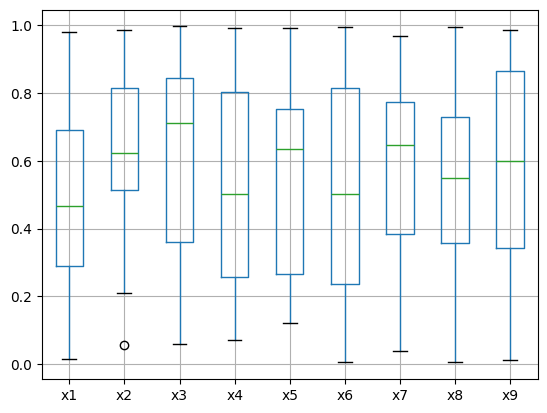

In [63]:
import pandas as pd


rand_matrix = pd.DataFrame(rand_matrix)
n_rows = rand_matrix.shape[1]
print(n_rows)

rand_matrix.columns = ['x1', 'x2','x3','x4','x5','x6','x7','x8','x9']
rand_matrix.boxplot()

Do some visualization with matplotlib, for example show the spread of the values in each  column

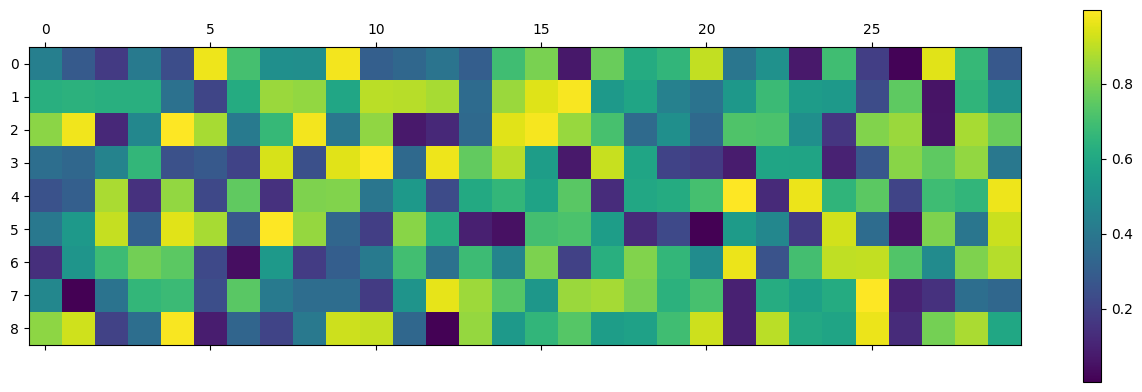

In [52]:
plt.matshow(rand_matrix.T)
plt.colorbar()
plt.show()

Imagine that the 9 samples in our table are the result of different experiments and we want to investigate the empirical distribution of each of them. Then we want to plot histogram of each sample separately. We would have to create 9 axes and then loop over them to plot each histigram on separate figure.

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'x3'}>],
       [<Axes: title={'center': 'x4'}>, <Axes: title={'center': 'x5'}>,
        <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'x7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'x9'}>]], dtype=object)

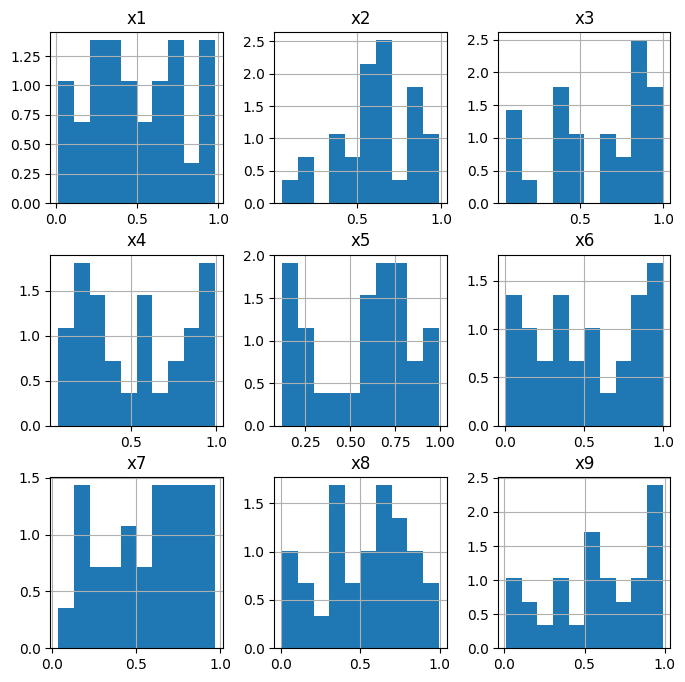

In [73]:
fig, axis = plt.subplots(3,3,figsize=(8, 8))
rand_matrix.hist(ax=axis, density = True)
